<a href="https://colab.research.google.com/github/Leguna/ML-RockPaperScissors-MessyClean/blob/main/AhmadTuflihun_MLPaperRockScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2021-04-16 06:05:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.21MB/s    in 5m 50s  

2021-04-16 06:11:34 (901 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-04-16 06:14:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  8.83MB/s    in 12s     

2021-04-16 06:14:52 (5.60 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [23]:
# Generate Dataset

#  Import
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import shutil


# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
local_zip2 = '/tmp/messy_vs_clean_room.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

zip_ref = zipfile.ZipFile(local_zip2, 'r')
zip_ref.extractall('/tmp')

zip_ref.close()
 
# Directory
room_dir = '/tmp/images/train'
rps_dir = '/tmp/rockpaperscissors/rps-cv-images'
# scissors_dir = '/tmp/rockpaperscissors/rps-cv-images/scissors'
# rock_dir = '/tmp/rockpaperscissors/rps-cv-images/rock'
# paper_dir = '/tmp/rockpaperscissors/rps-cv-images/paper'
# base_dir = '/tmp/data'

# Move Data
# shutil.rmtree(base_dir)
# shutil.move(room_dir,base_dir)
# shutil.move(scissors_dir,base_dir)
# shutil.move(rock_dir,base_dir)
# shutil.move(paper_dir,base_dir)

# Print List Dir
# print(os.listdir(base_dir))


In [91]:
# Training Rock Paper Scissors
# Model Generate

datagen = ImageDataGenerator(
                    validation_split=0.4,
                    rescale=1./255,
                    horizontal_flip=True,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = datagen.flow_from_directory(
        rps_dir, 
        shuffle=True,
        target_size=(100, 150),
        subset="training")
 
validation_generator = datagen.flow_from_directory(
        rps_dir,
        target_size=(100, 150),
        subset="validation")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(60, (3,3), activation='relu',input_shape=(100,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=20,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=15, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=8,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

model.save_weights('coba.h5')


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Epoch 1/15
20/20 - 22s - loss: 1.0794 - accuracy: 0.4000 - val_loss: 1.0134 - val_accuracy: 0.4961
Epoch 2/15
20/20 - 21s - loss: 0.9885 - accuracy: 0.4875 - val_loss: 0.8681 - val_accuracy: 0.5430
Epoch 3/15
20/20 - 21s - loss: 0.7674 - accuracy: 0.6969 - val_loss: 0.6528 - val_accuracy: 0.7305
Epoch 4/15
20/20 - 21s - loss: 0.5927 - accuracy: 0.7781 - val_loss: 0.4804 - val_accuracy: 0.8203
Epoch 5/15
20/20 - 20s - loss: 0.4304 - accuracy: 0.8516 - val_loss: 0.4680 - val_accuracy: 0.8008
Epoch 6/15
20/20 - 20s - loss: 0.3659 - accuracy: 0.8687 - val_loss: 0.2974 - val_accuracy: 0.8867
Epoch 7/15
20/20 - 20s - loss: 0.3273 - accuracy: 0.8820 - val_loss: 0.4242 - val_accuracy: 0.7852
Epoch 8/15
20/20 - 20s - loss: 0.2920 - accuracy: 0.8934 - val_loss: 0.2823 - val_accuracy: 0.9023
Epoch 9/15
20/20 - 20s - loss: 0.2563 - accuracy: 0.9125 - val_loss: 0.2097 - val_accuracy: 0.9414
Epoch 10/15
20/20 - 20s - 

In [90]:
# Training Clean & Messy
# Model Generate

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

data_gen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 

train_generator = data_gen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')
 
validation_generator = data_gen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=4,
        class_mode='binary')

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# latih model dengan model.fit 
model2.fit(
      train_generator,
      steps_per_epoch=30,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/30
30/30 - 8s - loss: 0.7904 - accuracy: 0.4583 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
30/30 - 7s - loss: 0.6985 - accuracy: 0.4917 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/30
30/30 - 7s - loss: 0.7045 - accuracy: 0.4500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
30/30 - 7s - loss: 0.6936 - accuracy: 0.5417 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 5/30
30/30 - 7s - loss: 0.7014 - accuracy: 0.4667 - val_loss: 0.6883 - val_accuracy: 0.6000
Epoch 6/30
30/30 - 7s - loss: 0.6988 - accuracy: 0.6250 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 7/30
30/30 - 7s - loss: 0.6997 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 8/30
30/30 - 7s - loss: 0.6742 - accuracy: 0.5083 - val_loss: 0.6390 - val_accuracy: 0.5500
Epoch 9/30
30/30 - 7s - loss: 0.6862 - accuracy: 0.5167 - val_loss: 0.6383 - val_accuracy: 0.6000
Epoch 10/30
30/30 - 7s - loss: 0.6694

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S.png
Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z.png
0CSaM2vL2cWX6Cay.png

[[0. 0. 1.]]
Scissors
0ePX1wuCc3et7leL.png

[[0. 0. 1.]]
Scissors
0Flw60Z2MAWWKn6S.png

[[0. 0. 1.]]
Scissors
0Ug54ifXRqqlZS2Z.png

[[0. 0. 1.]]
Scissors


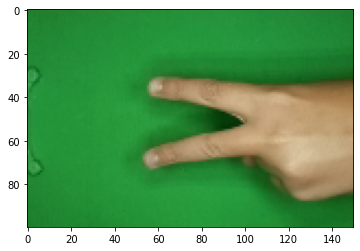

In [47]:
# Coba Upload Rock Paper Scissors

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print()
  print(classes)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1: 
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')

Saving 63.png to 63.png
Saving 64.png to 64.png
Saving 65.png to 65.png
Saving 66.png to 66.png
Saving 67.png to 67.png
63.png
messy
64.png
messy
65.png
messy
66.png
messy
67.png
messy


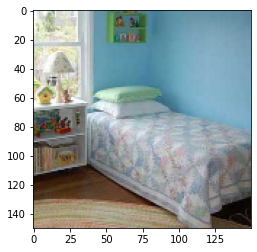

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')